### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section11)<br/>
    - 1.2 [Data source and data set](#section12)<br/>
- 2.[Load the packages and data](#section2)</br>
- 3.[Examining Data Available From An Existing Information Source-Data profiling](#section3)</br>
    - 3.1 [Pre_profiling](#section31)<br/>
    - 3.2 [Initial observations](#section32)<br/>
    - 3.3 [Post_profiling](#section33)<br/>
    - 3.4 [Final observations](#section34)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Convert timestamp to date-time](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Outlier Treatment](#section404)<br/>
    - 4.5 [Handling NaN data in categorical variables](#section405)<br/>            
    - 4.6 [Grouping](#section406)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Treatment vs work_interfere](#section501)<br/>
    - 5.2 [Age Category Vs seeking treatment](#section502)<br/>
    - 5.3 [Family history Vs Seeking treatment](#section503)<br/>
    - 5.4 [Employee count of Companies](#section505)<br/>
    - 5.5 [Employee Count Vs treatment](#section506)<br/>
    - 5.6 [Using Donut chart to check the relationship between Gender and Treatment](#section507)<br/>
    - 5.7 [Seaborn swarm plot](#section508)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [How does the frequency of mental health illness vary by geographic location?](#section601)<br/>
         - 6.1.1 [Which countries contribute the most?](#section602)<br/>
         - 6.1.2 [Which state contributes the most?](#section603)<br/>
         - 6.1.3 [What is the contribution of top 3 countries among all?](#section604)<br/>
         - 6.1.4 [What is the count and percentage of work interfere in work of the employees for the top 3 countries?](#section605)<br/>
         - 6.1.5 [What is the total number of employees going for treatment from the top 3 countries?](#section606)<br/>
         - 6.1.6 [ How many people did go for treatment on the basis of gender for the top 3 countries?](#section607)<br/>
     - 6.2 [Relationship between mental health and attitude.](#section608)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
# 1. Problem Statement
![Oct22_18_862457080.png](https://hbr.org/resources/images/article_assets/2018/10/Oct22_18_862457080.png " Mental Health")

__How do we better understand the prevalence of mental health issues in the workplace?__

<a id=section11></a> 
### 1.1. Introduction
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorder.
We are interested in gauging how mental health is viewed within the tech/IT workplace, and the prevalence of certain mental health disorders within the tech industry. The Open Sourcing Mental Illness team of volunteers will use this data to drive our work in raising awareness and improving conditions for those with mental health disorders in the IT workplace.

This Exploratory Data Analysis is to practice Python skills learned. This notebook will walk through step by step in order to explain thoroughly how to approach the data set. Based on my progress on data, I will try to give answer on observation.

<a id=section12></a> 
### 1.2. Data source and dataset
__a__. How was it collected? 

- __Name__: "Annual Mental Health in Tech Survey"
- __Sponsoring Organization__: Open Sourcing Mental Illness (OSMI)
- __Year__: 2014
- __Description__: "With over 1200 responses, we believe the 2014 __Mental Health in Tech Survey__ was the largest survey done on mental health in the tech industry." Since then, OSMI has conducted two more surveys, 2016 and 2017. and it's opne for 2019 survey.

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

__c__. Data Set Description


|Column Name  |Description |
|------|---------------|
|Timestamp|                                                                                                                                                                                                               |
|Age|                                                                                                                                                                                                               |
|Gender|                                                                                                                                                                                                               |
|Country|                                                                                                                                                                                                               |
|state| If you live in the United States, which state or territory do you live in?|
|self_employed| Are you self-employed?|
|family_history| Do you have a family history of mental illness?|
|treatment| Have you sought treatment for a mental health condition?|
|work_interfere| If you have a mental health condition, do you feel that it interferes with your work?|
|no_employees| How many employees does your company or organization have?|
|remote_work| Do you work remotely (outside of an office) at least 50% of the time?|
|tech_company| Is your employer primarily a tech company/organization?|
|benefits| Does your employer provide mental health benefits?|
|care_options| Do you know the options for mental health care your employer provides?|
|wellness_program| Has your employer ever discussed mental health as part of an employee wellness program?|
|seek_help| Does your employer provide resources to learn more about mental health issues and how to seek help?|
|anonymity| Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?|
|leave| How easy is it for you to take medical leave for a mental health condition?|
|mental_health_consequence| Do you think that discussing a mental health issue with your employer would have negative consequences?|
|phys_health_consequence| Do you think that discussing a physical health issue with your employer would have negative consequences?|
|coworkers| Would you be willing to discuss a mental health issue with your coworkers?|
|supervisor| Would you be willing to discuss a mental health issue with your direct supervisor(s)?|
|mental_health_interview| Would you bring up a mental health issue with a potential employer in an interview?|
|phys_health_interview| Would you bring up a physical health issue with a potential employer in an interview?|
|mental_vs_physical| Do you feel that your employer takes mental health as seriously as physical health?|
|obs_consequence| Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?|
|comments| Any additional notes or comments|


# 2. Load the packages and data

In [3]:
import sys                                                                      
import pandas as pd
import pandas_profiling
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics


'''
%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of 
plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that
produced it.
'''

%matplotlib inline

In [4]:
# we can see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
MentalData = pd.read_csv("C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet/MentalSurvey.csv")
pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
MentalData.head()
MentalData.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2/1/2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


<a id=section3></a> 
# 3.Examining Data Available From An Existing Information Source-Data profiling

In [5]:
MentalData.shape

(1259, 27)

In [6]:
MentalData.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [7]:
MentalData.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
MentalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

### Observation:
- Total row __1259__  and columns are __27__
- Few column has NULL value like commnets, self_employed, state, and work_interface.


In [9]:
total= MentalData.isnull().sum().sort_values(ascending=False)
percent_1 = MentalData.isnull().sum()/MentalData.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
comments,1095,87.0
state,515,40.9
work_interfere,264,21.0
self_employed,18,1.4
benefits,0,0.0


### Warnings
    comments has 1095 / 87.0% missing values Missing
    self_employed has 18 / 1.4% missing values Missing
    state has 515 / 40.9% missing values Missing
    work_interfere has 264 / 21.0% missing values Missing

In [10]:
null_columns=MentalData.columns[MentalData.isnull().any()]
null_columns

Index(['state', 'self_employed', 'work_interfere', 'comments'], dtype='object')

In [11]:
pd.set_option('float_format', '{:f}'.format)
MentalData.describe(include = 'all')              

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259.000000,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,nan,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,8/27/2014 15:24,nan,Male,United States,CA,No,No,Yes,Sometimes,25-Jun,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,nan,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,79428148.311358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2818299442.981952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1726.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations

- The mean, min and max are self-explanatory.
- As we can see there is huge discrepancies in Age column of dataset. It is having _minimum value as -1726_ which in reality is not possible 
- On the other hand side the _maximum limit is around 99999999_ which is not possible either, as the the age can't be less than 0

<a id = sectio31></id>

## 3.1 Pre_profiling

In [12]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(MentalData)
profile.to_file(outputfile="mypreprofillingmentalsurvey.html")     

<a id = sectio32></id>

## 3.2. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>Gender</strong> has 49 distinct responses. Group the responses into fewer categories. 
- <strong>Age</strong> has some values that are too low or too high to be real ages.
- The following variables have null values that may need to addressed.
 - <strong>state</strong>:  This should be null only when <strong>country</strong> is something other than the US
 - <strong>self_employed</strong>: There are 18 missing values. We need to investigate why.
 - <strong>work-interfere</strong>:  There are 264 missing values. The question begins with "If you have a mental health condition,..." so lets assume that those who did not respond, did so because they do not have a mental health condition currently. This is an imperfect assumption since we can't know that for sure; and because some people may have felt the need to respond even if they don't have a mental health condition, if they did not feel comfortable they left the question blank.
 - <strong>comments</strong>: There are 1095 missing values. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank. We may be able to learn something by doing a text analysis on the submitted comments: are there themes that come up in the comments that would inform the next version of the survey - for example, a popular theme might justify creating its own multiple-choice question next time.


<a id = sectio321></id>
### 3.2.1 Working With Age column 

In [13]:
print("'Age'")                                                                
print("Minimum value: ", MentalData["Age"].min())
print("Maximum value: ", MentalData["Age"].max())
print("How many values are NaN?: ", pd.isnull(MentalData['Age']).sum())

'Age'
Minimum value:  -1726
Maximum value:  99999999999
How many values are NaN?:  0


In [19]:
MentalData.Age.max()
a=MentalData.Age[MentalData.Age>123]
b=MentalData.Age[MentalData.Age<0]
print(a)
print(b)

99999999999

364            329
390    99999999999
Name: Age, dtype: int64
143      -29
715    -1726
1127      -1
Name: Age, dtype: int64


In [20]:
print("Count of distinct responses for Gender:", len(set(MentalData['Gender'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Gender:", set(MentalData['Gender']))    

Count of distinct responses for Gender: 49
Distinct responses for Gender: {'ostensibly male, unsure what that really means', 'Enby', 'Make', 'Female', 'm', 'male', 'Guy (-ish) ^_^', 'M', 'Man', 'Nah', 'non-binary', 'A little about you', 'female', 'F', 'queer', 'msle', 'Genderqueer', 'Cis Man', 'queer/she/they', 'something kinda male?', 'fluid', 'Cis Female', 'All', 'femail', 'Androgyne', 'cis-female/femme', 'Male-ish', 'Female (trans)', 'p', 'Mail', 'maile', 'Female ', 'Agender', 'Male ', 'Male', 'Male (CIS)', 'f', 'Femake', 'Malr', 'Woman', 'Neuter', 'Cis Male', 'male leaning androgynous', 'Female (cis)', 'woman', 'Trans woman', 'cis male', 'Mal', 'Trans-female'}


<a id=section34></a> 
### 3.4 Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
  - __Timestamp__: convert to datetime
 - __Age__: remove outliers as it is visible that the age column have two outliers as _329, 999999999999, -1, -1729 and -29_.
 - __Gender__: group into standardized categories 
- It will be important to decide how to handle NaN values.

<a id=section4></a> 
## 4. Data Normalization

In [22]:
MentalData.columns = map(str.lower, MentalData.columns) 
MentalData.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [24]:
MentalData.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [27]:
MentalData['timestamp'] = pd.to_datetime(MentalData['timestamp'])  

In [28]:
MentalData.dtypes

timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [30]:
#missing data
total = MentalData.isnull().sum().sort_values(ascending=False)
percent = (MentalData.isnull().sum()/MentalData.isnull().count()).sort_values(ascending=False)
missing_data.head(6)

,Total,%
comments,1095,87.000000
state,515,40.900000
work_interfere,264,21.000000
self_employed,18,1.400000
benefits,0,0.000000
Age,0,0.000000


In [31]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, just to make our lives easier.
MentalData = MentalData.drop(['comments'], axis= 1)
MentalData = MentalData.drop(['timestamp'], axis= 1)

MentalData.head(5)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<a id=section44></a> 
### 4.4. Outliers Treatment

For the purpose of this analysis, simply replace any __out-of-range age values with "NaN"__, rather than deleting the rows from the data set.  In a more detailed analysis it could be worth looking more closely at the rows with out-of-range ages and deciding whether it makes more sense to remove them. 

As we recall the age column had __5 outliers__, _3 below zero_ and _2 above 123_. Let us see how to handle them.


In [34]:
def clean_age(age):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if age>=0 and age<=123:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return age
    else:
        return np.nan
MentalData['age_clean'] = MentalData['age'].apply(clean_age)

print("'Age'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", MentalData["age_clean"].min())
print("Maximum value: ", MentalData["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(MentalData['age_clean']).sum())
print("Frequency table for age_clean:")
MentalData["age_clean"].value_counts().sort_index(0).head()

'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5
Frequency table for age_clean:


5.000000     1
8.000000     1
11.000000    1
18.000000    7
19.000000    9
Name: age_clean, dtype: int64

In [38]:
MentalData['age_Group'] = pd.cut(MentalData['age_clean'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)

Text(0.5,1,'Age Group vs Treatment')

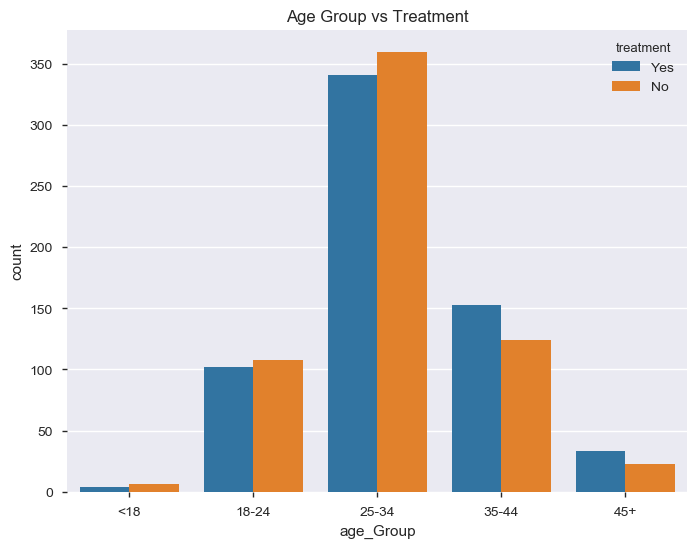

In [39]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = MentalData,x = 'age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

### Observations:
It can be infered from the above plot that the __Age_group 2(18-24) is mildly concious, 4(35-44) is heavily concious and 3 (25-34)__ are lesser compared to previous about their mental issue and are up for treatment.

### View the age distribution of the sample

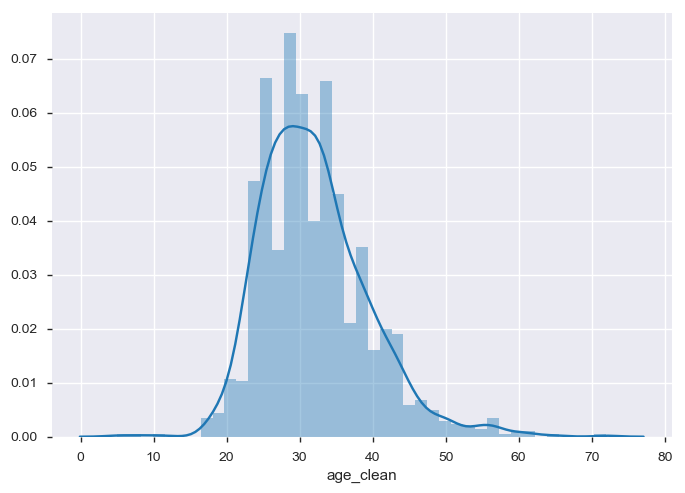

In [43]:
sns.distplot(MentalData["age_clean"].dropna());

### Observations
- Peak between _mid-20s to about mid-30s_.  

<a id=section405></a>
## 4.5. Handling NaN data in the categorical columns
- There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows. More detail:
 - __state__:  the missing values are likely to occur in the instances where the country is not "United States". 
 - __work_intefere__:  the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.
 - __self_employed__: there are 18 missing values and it indicates the respondent may have left the column, as this column so it hold much of a importance to analysis, So it's better to impute with values in order to make the data normal.

In [47]:
#There are only 0.014% of self employed so let's replace NaN with mode()
#Replace "NaN" string from defaultString
MentalData['self_employed'] = MentalData['self_employed'].fillna(MentalData['self_employed'].mode()[0])
print(MentalData['self_employed'].unique())

['No' 'Yes']


In [52]:
#There are only 0.20% of self work_interfere so let's replace NaN with mode()
#Replace "NaN" string from defaultString

MentalData['work_interfere'] = MentalData['work_interfere'].fillna(MentalData['work_interfere'].mode()[0])
print(MentalData['work_interfere'].unique())
MentalData['work_interfere'].value_counts()

['Often' 'Rarely' 'Never' 'Sometimes']


Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

<a id=section406></a> 
## 4.6. Grouping
### Gender Distribution

Consolidate the gender variable into the following categories, given the _nature_ and _quantities_ of the __open-ended responses__.
- Male
- Femalea
- Trans


In [54]:
#clean 'Gender'
#Slower case all columm's elements
gender = MentalData['gender'].str.lower()
#print(gender)

#Select unique elements
gender = MentalData['gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in MentalData.iterrows():

    if str.lower(col.gender) in male_str:
        MentalData['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        MentalData['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        MentalData['gender'].replace(to_replace=col.gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
MentalData = MentalData[~MentalData['gender'].isin(stk_list)]

print(MentalData['gender'].unique())

['female' 'male' 'trans']


## Gender distribution of the sample

<Figure size 1000x500 with 0 Axes>

Text(0.5,1,'Gender Counts')

Text(0.5,0,'Gender')

Text(0,0.5,'Frequency')

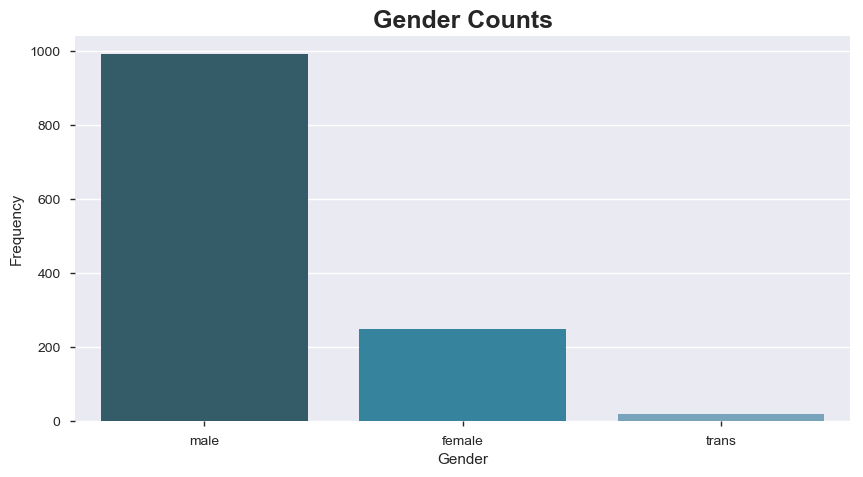

In [55]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data = mh, order = mh['gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

Text(0.5,1,'treatment (male)')

Text(0.5,1,'treatment (female)')

Text(0.5,1,'treatment (trans)')

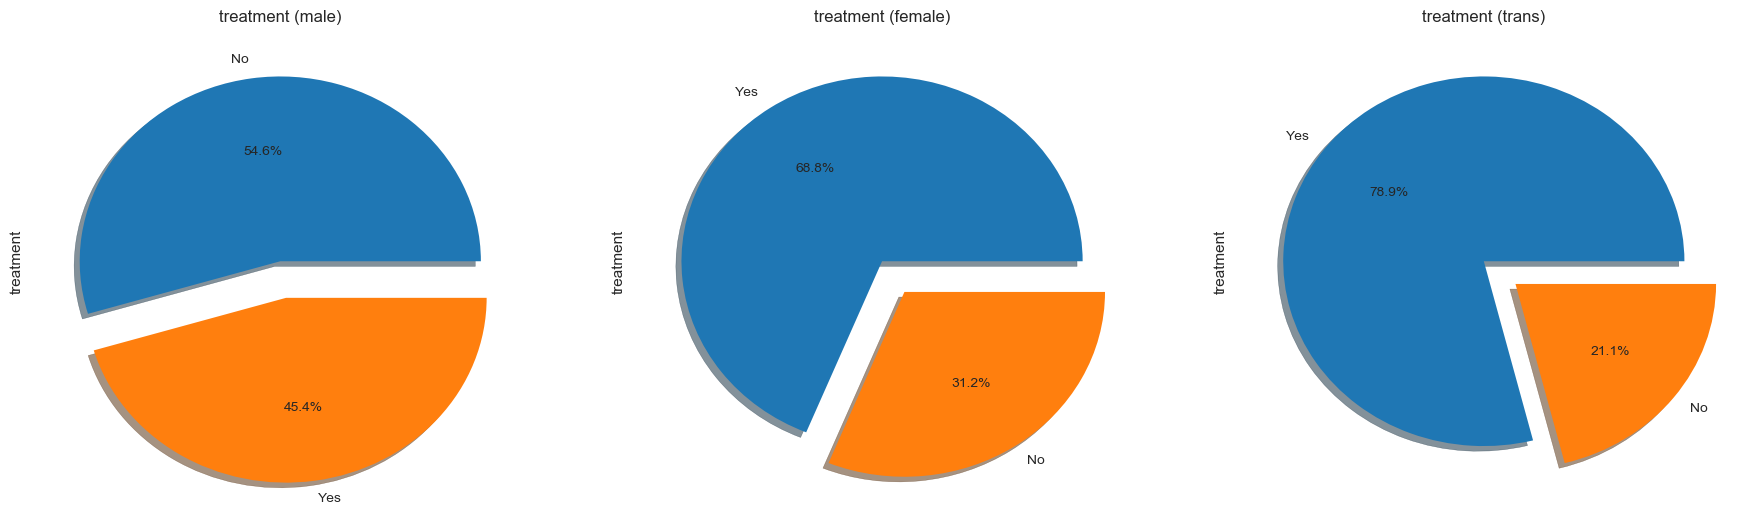

In [56]:
f,ax = plt.subplots(1,3,figsize=(22,6))
MentalData['treatment'][MentalData['gender'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
MentalData['treatment'][MentalData['gender'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
MentalData['treatment'][MentalData['gender'] == 'trans'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('treatment (male)')
ax[1].set_title('treatment (female)')
ax[2].set_title('treatment (trans)')

### Observations

__Female__ and __trans__ is more affected than males in ratio terms .

## Pandas profiling post data manipulation

In [59]:
post_profile = pandas_profiling.ProfileReport(MentalData)
post_profile.to_file(outputfile="mypostprofillingmentalsurvey.html")

## Create a copy of "mh" dataframe for Label encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [60]:
MentalData_new = MentalData.copy(deep=True)

### Dealing with Categorical Variables

In [61]:
from sklearn.preprocessing import LabelEncoder    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                           # Here as our data set consists only of categorical values except age
for i in MentalData_new.columns:                          # in order to find the correlation between variables, we do Label encoding 
    MentalData_new[i] = number.fit_transform(MentalData_new[i].astype('str'))

In [63]:
corr=MentalData_new.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
work_interfere               0.136273
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
country                      0.080096
age_clean                    0.076312
age                          0.074897
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
age_Group                    0.051030
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
no_employees                 0.017050
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
state                       -0.099801
gender      

<Figure size 1500x800 with 0 Axes>

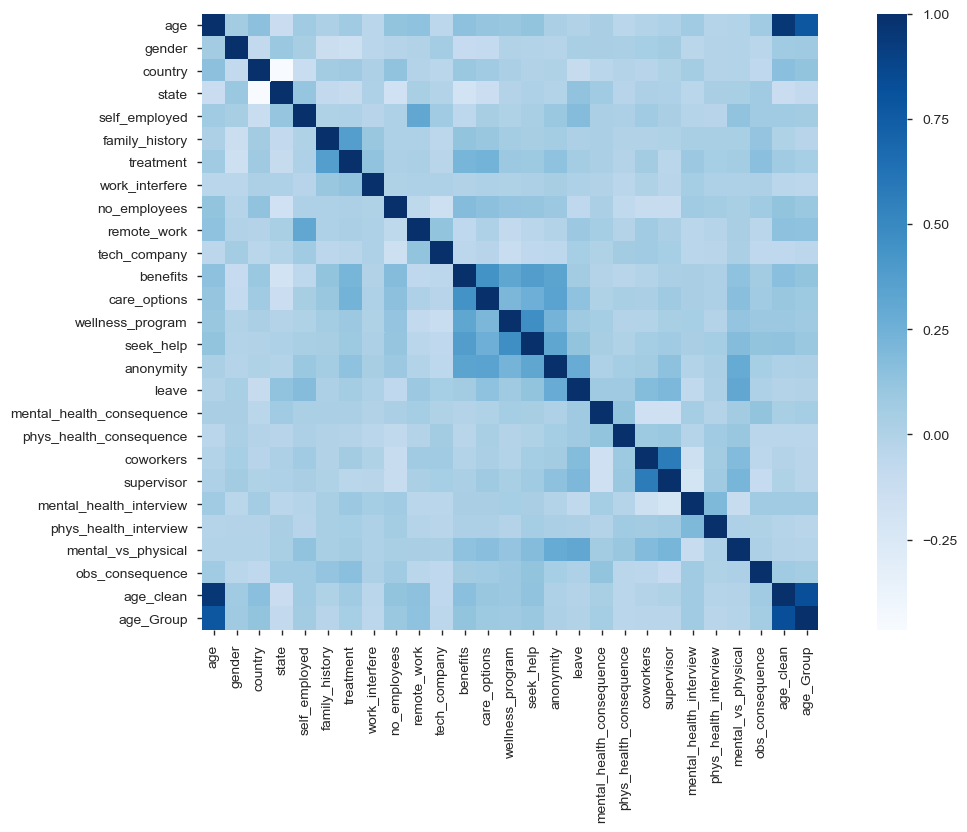

In [64]:
features_correlation = MentalData_new.corr()
plt.figure(figsize=(15,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

__benefits__,__care_options__,__wellness_program__,__seek_help__ and __anonymity__ are correalated with __each other__ and same with __coworkers and supervisor__

<a id=section5><a/>
## 5. Identify patterns in the data
<a id=section501><a/>
### 5.1. Treatment v. work_interfere

Text(0.5,1,'work_interfere (Often)')

Text(0.5,1,'work_interfere (Rarely)')

Text(0.5,1,'work_interfere (Never)')

Text(0.5,1,'work_interfere (Sometimes)')

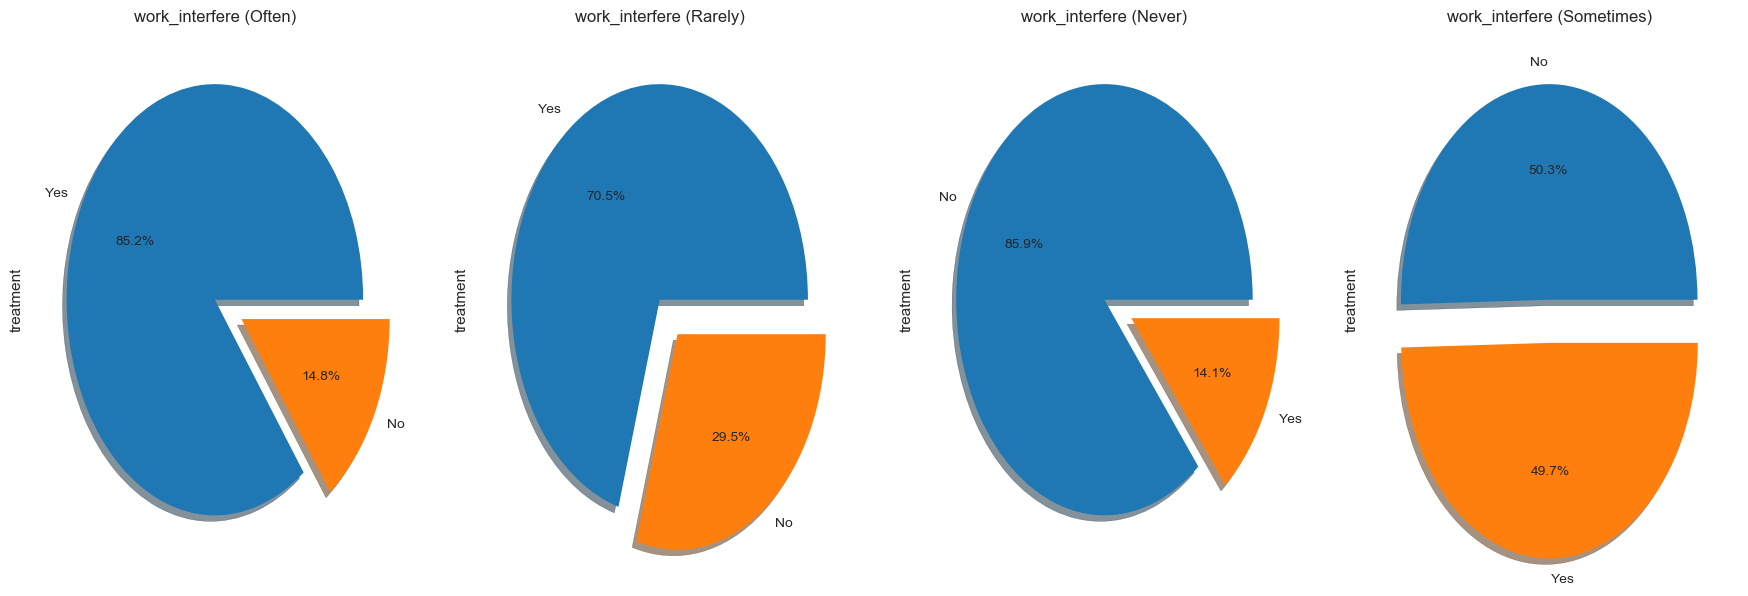

In [69]:
f,ax = plt.subplots(1,4,figsize=(22,7))
MentalData['treatment'][MentalData['work_interfere'] == 'Often'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
MentalData['treatment'][MentalData['work_interfere'] == 'Rarely'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
MentalData['treatment'][MentalData['work_interfere'] == 'Never'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
MentalData['treatment'][MentalData['work_interfere'] == 'Sometimes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('work_interfere (Often)')
ax[1].set_title('work_interfere (Rarely)')
ax[2].set_title('work_interfere (Never)')
ax[3].set_title('work_interfere (Sometimes)')

### Observation

So the employees who are __"Often"__ and __"Rarely"__ interferred during their work are more likely to have mental health issue and they tend to go for treatment.

In [73]:
df = pd.DataFrame({'treatment': MentalData['treatment'], 'work_interfere': MentalData['work_interfere']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print("Pearson:", df_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:                 treatment  work_interfere
treatment        1.000000        0.136273
work_interfere   0.136273        1.000000



<Figure size 400x400 with 0 Axes>

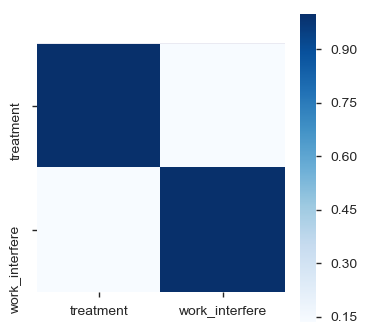

In [74]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

### 5.2. Age Category v. seeking treatment

Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.


Text(0.5,0,'If they go for treatment or not?')

Text(0,0.5,'AgeGroup')

Text(0.5,1,'Age Category Vs. Seeking Treatment')

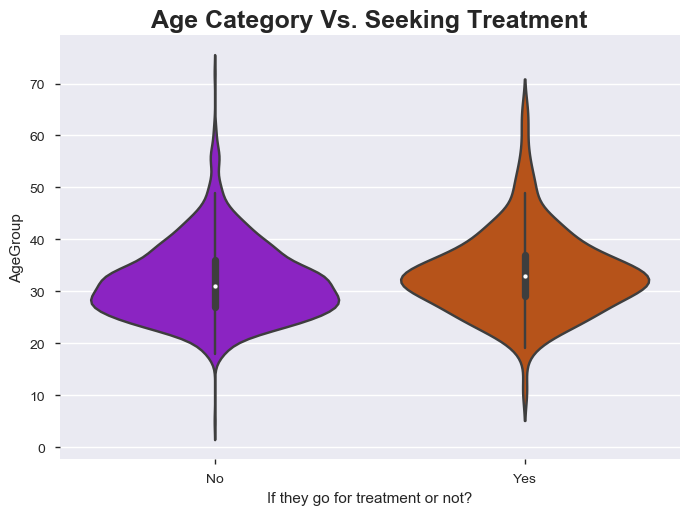

In [76]:
ax = sns.violinplot(x="self_employed", y="age_clean", palette="gnuplot", data=MentalData)
plt.xlabel("If they go for treatment or not?")
plt.ylabel("AgeGroup")
plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")

### Observation
What inferences are you getting from the above violin plot? <br/>
Nothing much, Right? <br/>
Therefore, what type of plot you have to use depends on the data you are working on. You can't use every plot everywhere. Every plot has its own utility and its best to keep in mind the data on which you are working on and check which chart is feasible as per your requirement nad visualization.



### 5.3. Family History v. Seeking Treatment

There appears to be a pretty clear correlation between these two variables, too.

<Figure size 1000x500 with 0 Axes>

Text(0.5,1,'Does family history effects mental health ? ')

Text(0,0.5,'Do they go mental health treatment?')

Text(0.5,0,'Family History')

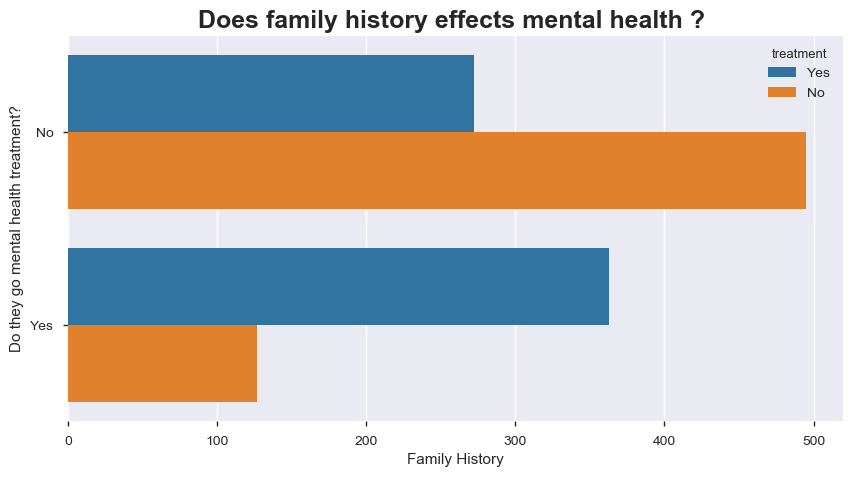

In [79]:
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=MentalData)
plt.title("Does family history effects mental health ? ",fontsize=18,fontweight="bold")
plt.ylabel("Do they go mental health treatment?")
plt.xlabel("Family History")
plt.show()

### Observation

The employees _having_ Family History are very much likely to go for treatment.

### 5.4. Employee count of Comapnies

<Figure size 1000x500 with 0 Axes>

Text(0.5,1,'Employee Count of Companies')

Text(0,0.5,'Frequency')

Text(0.5,0,'Company Size')

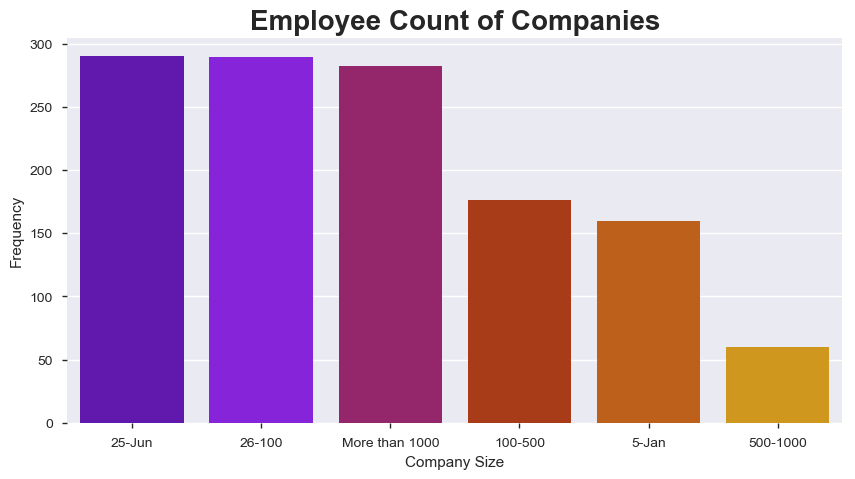

In [83]:
plt.figure(figsize=(10,5))
sns.countplot('no_employees',data = MentalData, order = MentalData['no_employees'].value_counts().index,palette="gnuplot")
plt.title("Employee Count of Companies",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Company Size")
plt.show()

## Observation
Company Size of _6-25_ has the __highest frequency__ of employees and the one having employee in the range of _500-1000_ has the __least frequency__ among the data set.

Text(0.5,1,'Work interfere Distribution')

Text(0,0.5,'Count')

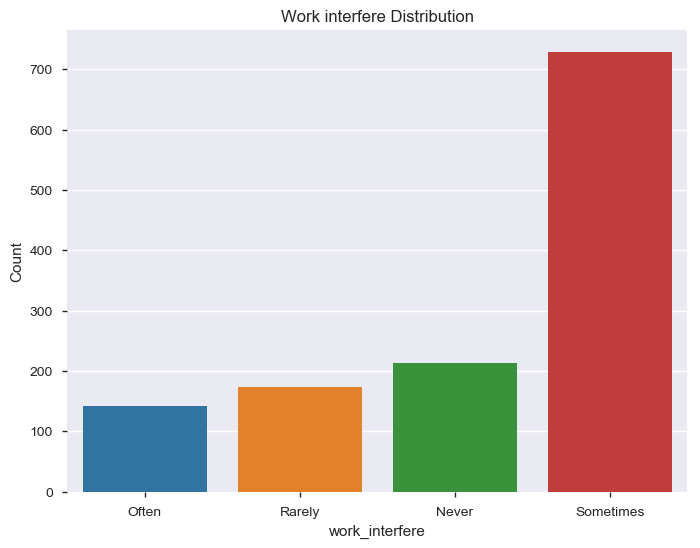

In [84]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(MentalData['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

### Observation
The workers are interfered __sometimes__ for the _maximum number_ of time and __often__  for the _least number_ of times.

## 5.5. Employee Count vs Treatment

<Figure size 1000x500 with 0 Axes>

Text(0.5,1,'Employee count vs Treatment')

Text(0,0.5,'Number of people going for Treatment')

Text(0.5,0,'Company Size')

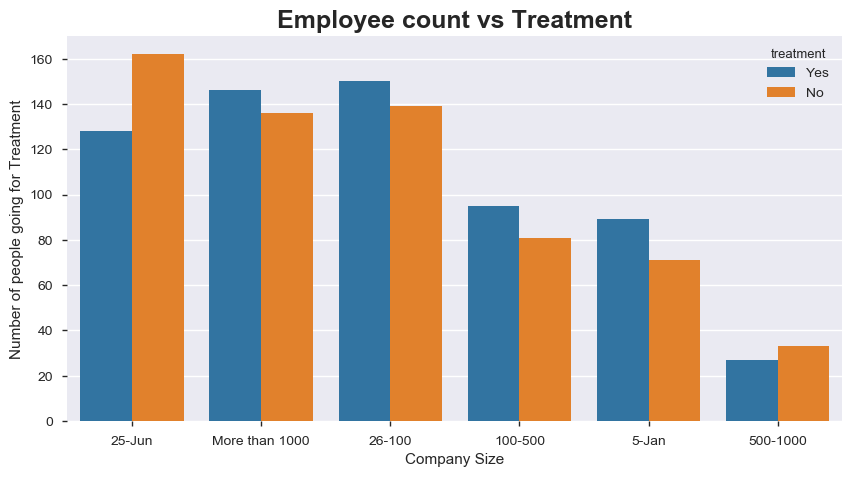

In [85]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=MentalData)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("Number of people going for Treatment")
plt.xlabel("Company Size")
plt.show()

### Observation
The _maximum number_ of _people going for treatment_ belongs to __Company Size 26-100__ and those _not going for treatment belongs_ to __Company Size 6-25__.

### 5.6 Which countries contributes the most
Explore the state data and its relationship to the frequency of mental health illness. A response to work_interfere will be inferred to mean that the respondent experienced a mental health condition at the time of their response. From a non-response I will infer the non-existence of a mental health condition.

Text(0.5,1,'Top ten country')

Text(0.5,0,'Country')

Text(0,0.5,'Count')

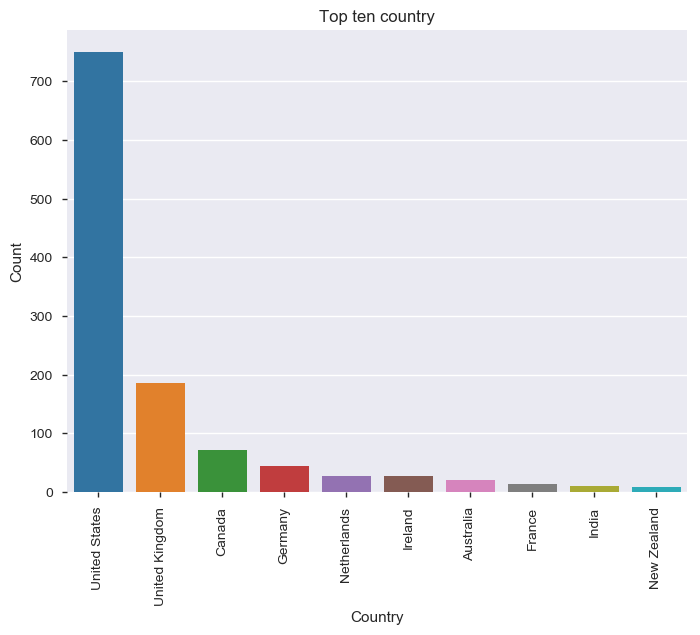

In [87]:
from collections import Counter
country_count = Counter(MentalData['country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

### Observation

As from the above plot it can be seen that __US__ contributed the most with __751 respondents__ and now further exploring the states of US

## 5.7 Which state contributes the most?

<Figure size 1000x500 with 0 Axes>

Text(0.5,1,'Top 10 US states in terms of contribution')

Text(0.5,0,'')

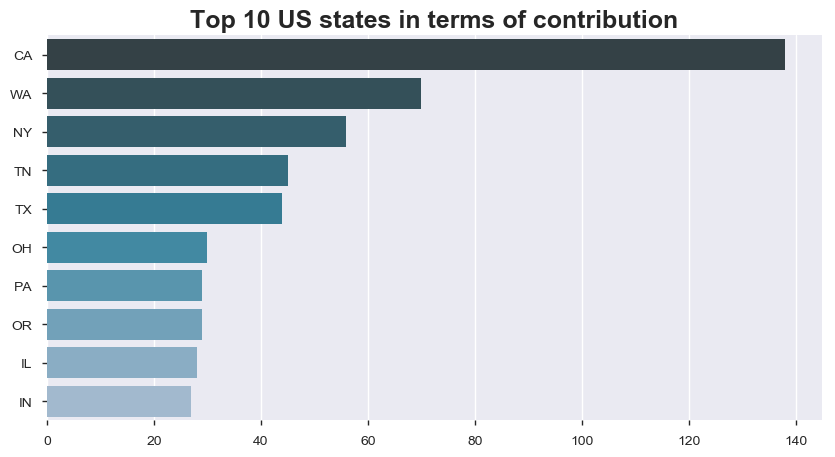

In [90]:
usa = MentalData.loc[MentalData['country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

### Observation

__CALIFORNIA__ is the state contributing the most in the survey with __138 respndents__.

## 5.8. What is the contribution of top3 countries among all?

In [101]:
MentalData['country'].value_counts().head(3)

United States     750
United Kingdom    185
Canada             72
Name: country, dtype: int64

In [104]:
countries = pd.concat([MentalData.loc[MentalData['country']=='Canada'], 
                       MentalData.loc[MentalData['country']=='United States'],
                       MentalData.loc[MentalData['country']=='United Kingdom']]).reset_index(drop=True)
print('There consists {} people from the top 3 countries out of the {} people surveyed'.format(countries.shape[0], MentalData.shape[0]))

There consists 1007 people from the top 3 countries out of the 1257 people surveyed


### 5.9 What is the count and percentage of work interfere in work of the employees for the top 3 countries?¶


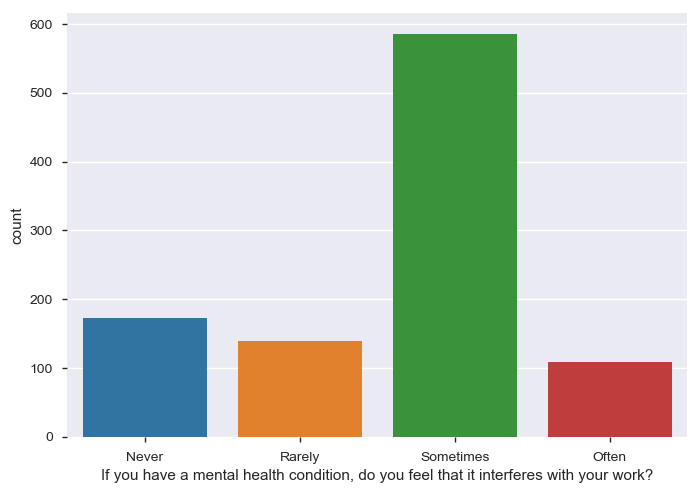

In [105]:
sns.countplot(x=countries['work_interfere'], order=['Never', 'Rarely', 'Sometimes', 'Often']);
plt.xlabel('If you have a mental health condition, do you feel that it interferes with your work?');

In [106]:
work_sum = countries['work_interfere'].value_counts().reset_index()
more_than_never = work_sum['work_interfere'][0] + work_sum['work_interfere'][2] + work_sum['work_interfere'][3]
print('{} people, or {:.1%}, believe that their mental health condition interferes with their work either sometimes or more'.format(more_than_never, more_than_never/countries.shape[0]))
print('With {} ({:.1%}) people saying it intereferes often'.format(work_sum['work_interfere'][3], work_sum['work_interfere'][3]/countries.shape[0]))

834 people, or 82.8%, believe that their mental health condition interferes with their work either sometimes or more
With 109 (10.8%) people saying it intereferes often


### 5.10 What is the total number of employees going for treatment from the top 3 countries

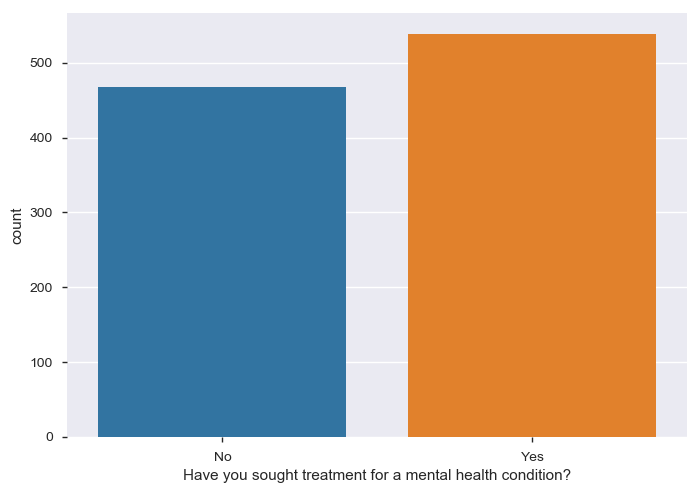

In [107]:
#rcParams['figure.figsize'] = 8, 6
sns.countplot(countries['treatment']);
plt.xlabel('Have you sought treatment for a mental health condition?');

In [108]:
treatment_count = countries['treatment'].value_counts().reset_index()
print('Luckily {} ({:.1%}) have sought treatment for their mental health issues'.format(treatment_count['treatment'][0], treatment_count['treatment'][0]/countries.shape[0]))

Luckily 539 (53.5%) have sought treatment for their mental health issues


### 5.11  How many people did go for treatment on the basis of gender for the top 3 countries?

In [110]:
male = countries.loc[countries['gender']=='male']
male_treatment = male.loc[male['treatment']=='Yes'].reset_index(drop=True)

female = countries.loc[countries['gender']=='female']
female_treatment = female.loc[female['treatment']=='Yes'].reset_index(drop=True)

trans = countries.loc[countries['gender']=='trans']
trans_treatment = trans.loc[trans['treatment']=='Yes'].reset_index(drop=True)

print('Out of {} males surveyed, {} ({:.1%}) sought treatment'.format(male.shape[0], male_treatment.shape[0], male_treatment.shape[0]/male.shape[0]))
print('Out of {} females surveyed, {} ({:.1%}) sought treatment'.format(female.shape[0], female_treatment.shape[0], female_treatment.shape[0]/female.shape[0]))
print('Out of {} people who identify as anything other than male or female surveyed, {} ({:.1%}) sought treatment'.format(trans.shape[0], trans_treatment.shape[0], trans_treatment.shape[0]/trans.shape[0] ))

Out of 772 males surveyed, 371 (48.1%) sought treatment
Out of 220 females surveyed, 156 (70.9%) sought treatment
Out of 15 people who identify as anything other than male or female surveyed, 12 (80.0%) sought treatment


### 5.12 Relationship between mental health and attitude.

col_0      count
attitudes       
Moderate     477
Negative     290
Positive     490
If we didn't miss anything, this will equal 1257: 1257
AxesSubplot(0.125,0.11;0.775x0.77)


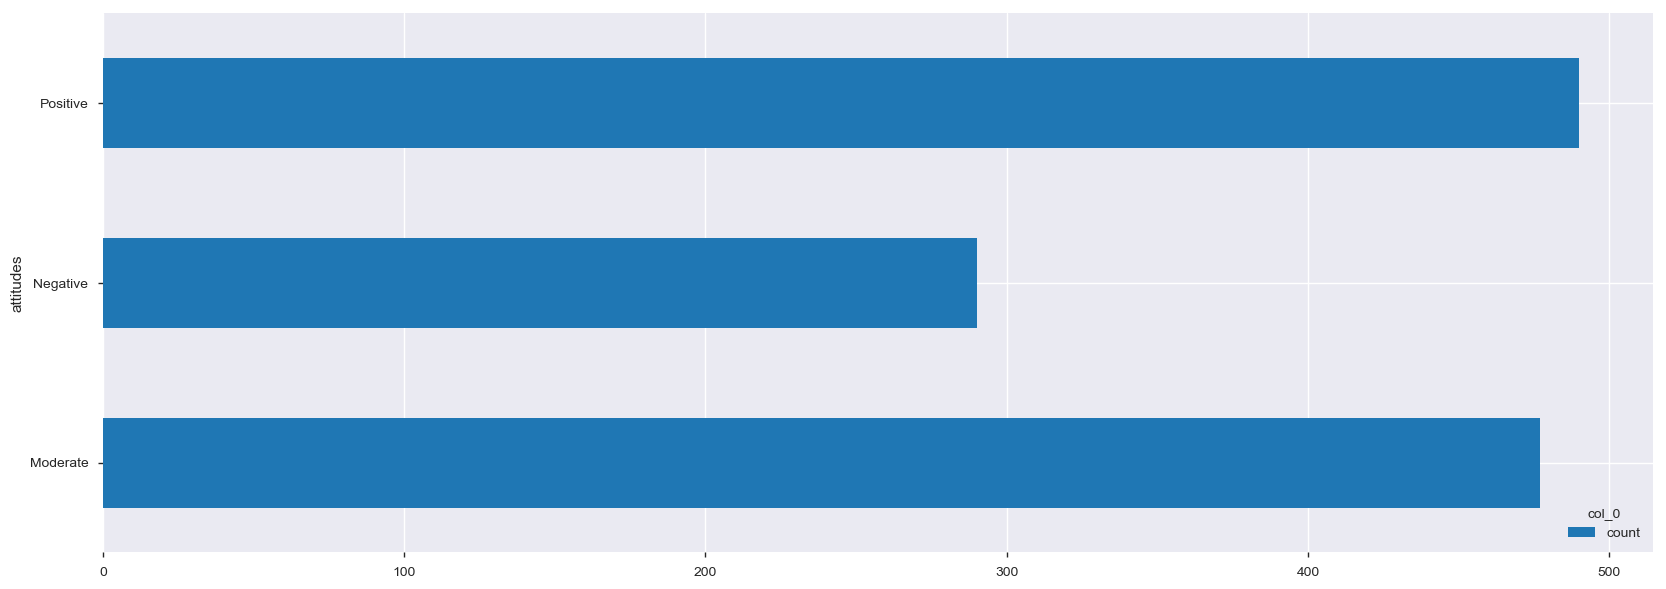

In [112]:
                                                                                                         # Convert the mental_health_consequence responses into a new variable, 

MentalData['attitudes'] = MentalData['mental_health_consequence']                                                        # Make a copy of the column to preserve the original data. Work with the new column going forward.

positive = ["No"]                                                                                        # Assign each type of response to one of two categories
negative = ["Yes"]
moderate = ['Maybe']

MentalData['attitudes'] = MentalData['attitudes'].apply(lambda x:"Positive" if x in positive else x)
MentalData['attitudes'] = MentalData['attitudes'].apply(lambda x:"Negative" if x in negative else x)
MentalData['attitudes'] = MentalData['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)


attitudes_tab = pd.crosstab(index=MentalData["attitudes"], columns="count")                                      # Make a crosstab to view the count for each of the new categories

print(attitudes_tab)

print("If we didn't miss anything, this will equal 1257:", len(MentalData['attitudes']))                         # Confirm that we didn't miss any entries

print(attitudes_tab.plot(kind="barh", 
                 figsize=(20,7),
                 stacked=True))

# Conclusion

- The Mental Health Survrey being conducted helps us to know the __mental condition__ of employee working in _Tech firms_ across the participating countries.
- Total of __1297__ entries were made during the survey out of which __1007__ contributions were from the _top 3 countries_ in the survey.
- The __United States__ lead the chart in terms of participation in the survey followed by _United Kingdom_ and _Canada_.
- __California__ lead the chart when analysis was run down on the basis of states.
- __48.1% of male__, __70% of females__ and __12% of trans__ did sought for the __treatment__ among the others who participated in survey respectively.
- From the analyis, it was concluded that __family history, work interfere, no of employees in the company and age category__ were the main parameters _affecting the mental health and thus requiring treatment_.